In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [84]:
from scipy.stats import pearsonr

In [85]:
PRO_SEQ_NAMES = ['pro_seq_0', 'pro_seq_1']
RNA_SEQ_NAMES = ['rna_seq_0', 'rna_seq_1', 'rna_seq_2', 'rna_seq_3']

In [86]:
gene_fes = pd.read_csv("../data/ref/homo_sapiens/annot/out/fe_stat.csv")
gene_tpm = pd.read_csv("../data/blumberg21/gene_tpm.csv")

In [87]:
gene_tpm['mean_pro_log1p_tpm'] = np.log1p(gene_tpm[PRO_SEQ_NAMES].mean(axis=1))
gene_tpm['mean_rna_log1p_tpm'] = np.log1p(gene_tpm[RNA_SEQ_NAMES].mean(axis=1))

In [88]:
frame = gene_fes.merge(gene_tpm, on='gene')
frame.loc[frame['tran_no'] > 5, 'tran_no'] = 5

In [89]:
frame

,gene,fe_no,ss_no,make_up,tran_no,pro_seq_0,pro_seq_1,rna_seq_0,rna_seq_1,rna_seq_2,rna_seq_3,mean_pro_log1p_tpm,mean_rna_log1p_tpm
0,ENSG00000000003,2,4,X:100636793-100637104:0=3;X:100639945-10063999...,4,3.137302,0.000000,1.939708,3.672193,0.000000,6.278461,0.943381,1.379418
1,ENSG00000000005,2,2,X:100584936-100585066:1=1;X:100593895-10059403...,2,0.000000,0.000000,2.976584,0.000000,0.000000,3.853852,0.000000,0.996066
2,ENSG00000000419,6,6,20:50942031-50942126:0=1;20:50945847-50945923:...,5,546.968177,607.890469,628.513588,655.466298,658.867474,659.831319,6.360316,6.479538
3,ENSG00000000457,3,3,1:169888676-169888890:0=1;1:169893788-16989395...,5,392.310936,376.959900,133.405276,142.592922,139.600432,142.971584,5.954892,4.946222
4,ENSG00000000460,4,5,1:169662007-169662523:1=1;1:169794730-16979490...,5,623.708329,617.488849,583.583957,554.501175,568.251020,544.055457,6.432295,6.334341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19067,ENSG00000293563,1,2,12:13980726-13980895:0=2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19068,ENSG00000293569,1,1,14:92627615-92627966:0=1,1,20.965488,21.316920,0.810149,2.300623,0.000000,0.000000,3.097440,0.575316
19069,ENSG00000293570,2,2,19:20358163-20358333:1=1;19:20362626-20362794:1=1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19070,ENSG00000293584,1,1,2:111121153-111121188:1=1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


PearsonRResult(statistic=0.38749416163309525, pvalue=0.0)


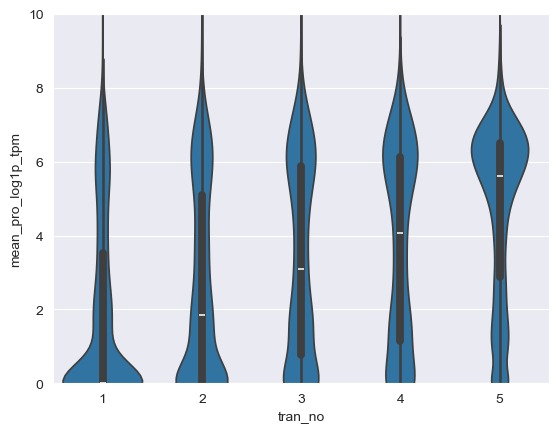

In [90]:
sns.violinplot(frame, x='tran_no', y='mean_pro_log1p_tpm')
_ = plt.ylim(0, 10)

print(pearsonr(frame['tran_no'].values, frame['mean_pro_log1p_tpm'].values))

plt.savefig("figs/supp3d_pro.pdf")

PearsonRResult(statistic=0.3559289757682478, pvalue=0.0)


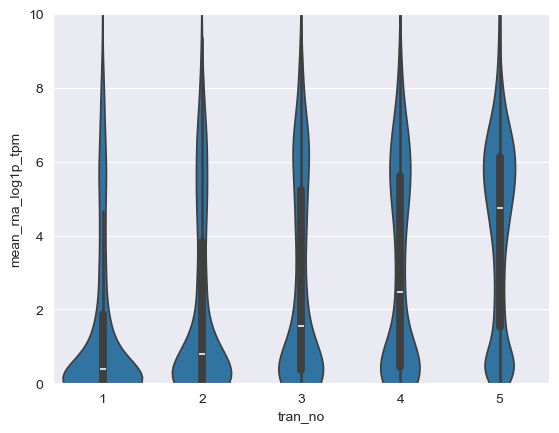

In [91]:
sns.violinplot(frame, x='tran_no', y='mean_rna_log1p_tpm')
_ = plt.ylim(0, 10)

print(pearsonr(frame['tran_no'].values, frame['mean_rna_log1p_tpm'].values))

plt.savefig("figs/supp3d_rna.pdf")